In [1]:
!pip install konlpy
import pandas as pd
import numpy as np
from konlpy.tag import Okt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 50.2 MB/s 
     |████████████████████████████████| 465 kB 25.9 MB/s 


In [2]:
import tensorflow as tf
tf.random.set_seed(777)
from sklearn.model_selection import train_test_split

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
from google.colab import files
myfile = files.upload()

Saving news.csv to news.csv


In [5]:
df = pd.read_csv("/content/news.csv",  encoding = "CP949", engine='python')
df.head()

,Title,Contents,Category
0,"""사는 게 왜 재미없을까?"" 오늘도 혼잣말했다면...",\n'어떻게 놀 것인가' 모르면 여가 즐기기 어려워... 행복에도 교육이 필요하다 ...,생활/문화
1,2년 동안 카톡에서 생일 알람을 꺼봤습니다,\n이 글을 카카오는 싫어하겠지만... 많은 사람들에게 축하받는다고 행복할까요【오마...,생활/문화
2,참 특이한 과일... 100개 쌓아두고 먹으면 봄이 옵니다 [보그(Vogue) 춘양],\n춘양 마을 어르신들이 기억하는 겨울철 대봉의 맛【오마이뉴스의 모토는 '모든 시민...,생활/문화
3,40대에 은퇴했더니 방송국에서... <그알>은 아닙니다 [이제 겨우 절반 살았을 뿐...,\nKBS 인간극장 '방금 은퇴했습니다' 촬영 후기 1편하고 싶은 일이 많아 남들보...,생활/문화
4,"""꼼수에 당했다""…명품 카페 발칵 뒤집은 까르띠에 '갑질' [안혜원의 명품의세계]",\n[안혜원의 명품의세계] 24회명품 갑질 '도' 넘었다가격 올려받기에 일방적 주문...,생활/문화


In [6]:
data_list = []
data_list.append(df)

In [7]:
data=pd.DataFrame()
for i in data_list:
    data = pd.concat([data,i],ignore_index=True)

In [8]:
data.isnull().sum()

Title       0
Contents    0
Category    0
dtype: int64

In [9]:
len(data[data.duplicated()])

9

In [10]:
data=data.drop_duplicates(ignore_index = True)


In [11]:
data["Contents"] = data["Contents"].str.replace(pat=r'[^\w]', repl=r' ', regex=True)

In [12]:
data['Category']=data['Category'].str.split('>', expand=True).get(0)
data

,Title,Contents,Category
0,"""사는 게 왜 재미없을까?"" 오늘도 혼잣말했다면...",어떻게 놀 것인가 모르면 여가 즐기기 어려워 행복에도 교육이 필요하다 ...,생활/문화
1,2년 동안 카톡에서 생일 알람을 꺼봤습니다,이 글을 카카오는 싫어하겠지만 많은 사람들에게 축하받는다고 행복할까요 오마이...,생활/문화
2,참 특이한 과일... 100개 쌓아두고 먹으면 봄이 옵니다 [보그(Vogue) 춘양],춘양 마을 어르신들이 기억하는 겨울철 대봉의 맛 오마이뉴스의 모토는 모든 시민은...,생활/문화
3,40대에 은퇴했더니 방송국에서... <그알>은 아닙니다 [이제 겨우 절반 살았을 뿐...,KBS 인간극장 방금 은퇴했습니다 촬영 후기 1편하고 싶은 일이 많아 남들보다...,생활/문화
4,"""꼼수에 당했다""…명품 카페 발칵 뒤집은 까르띠에 '갑질' [안혜원의 명품의세계]",안혜원의 명품의세계 24회명품 갑질 도 넘었다가격 올려받기에 일방적 주문 ...,생활/문화
...,...,...,...
1186,"尹, 월드컵 16강 진출 즉시 축전 ""투지·열정 국민에 큰 감동""",기사내용 요약 승패 넘어 한국 축구 가능성 온 세상에 보여주길 저도 함께 응원하...,정치
1187,"‘서해 피격’ 이래진씨, 文 맹폭…“뭐를 더 감추고 더 후벼야 속이 시원하나”",안보를 또 다시 운운하며 도 넘지 말라 는 이런 망발 하고 있어 어이가 없다 ...,정치
1188,이재명이 몰고온 민주당 분당설…개딸이 기름 붓기,사법 리스크 본격화에 친명 비명 갈등 수면 위로일각선 분당 전망 李 지지자들은...,정치
1189,"[주간政談<상>] '분열과 갈등'의 정치 전선 넓히는 대통령실...""왜 그렇죠?""",얽히고설킨 예산안 국정조사 해임건의안 에 꽉 막힌 국회의 시간 대통령실...,정치


In [13]:
okt = Okt() #okt사용

def okt_morphs(doc):
    tmp=okt.morphs(doc,stem=True)
    return tmp

def okt_nouns(doc):
    tmp=okt.nouns(doc)
    return tmp

def okt_pos(doc):
    tmp=[]
    for i,j in okt.pos(doc):
        if j in ['Noun','Adjective']:
            tmp.append(i)
    return tmp

In [14]:
data['본문정리morphs']=data['Contents'].apply(okt_morphs)
data['본문정리nouns']=data['Contents'].apply(okt_nouns)
data['본문정리pos']=data['Contents'].apply(okt_pos)

In [15]:
categories=np.unique(data['Category']) #카테고리 안겹치게 한종류씩
categories

array(['IT/과학', '경제', '사회', '생활/문화', '세계', '정치'], dtype=object)

In [16]:
category={}
for i in categories:
    category[i]=len(data[data['Category']==i])

In [17]:
category #카테고리별 데이터셋 수

{'IT/과학': 199, '경제': 200, '사회': 199, '생활/문화': 200, '세계': 194, '정치': 199}

In [18]:
lcategories=list(categories)
def category(ct):
    return lcategories.index(ct)
data['숫자카테고리']=data['Category'].apply(category)
data['숫자카테고리']

0       3
1       3
2       3
3       3
4       3
       ..
1186    5
1187    5
1188    5
1189    5
1190    5
Name: 숫자카테고리, Length: 1191, dtype: int64

In [19]:
data=data.sample(frac=1).reset_index(drop=True)

In [20]:
data.head()

,Title,Contents,Category,본문정리morphs,본문정리nouns,본문정리pos,숫자카테고리
0,"평일 오후 5시, 스쿨존서 만취운전…하교하던 9살 사망",폴리스라인 연합뉴스 자료사진서울 강남의 한 초등학교 인근에서 만취 운전 ...,사회,"[폴리스, 라인, 연합뉴스, 자료, 사진, 서울, 강남, 의, 하다, 초등학교, 인...","[폴리스, 라인, 연합뉴스, 자료, 사진, 서울, 강남, 초등학교, 인근, 만취, ...","[폴리스, 라인, 연합뉴스, 자료, 사진, 서울, 강남, 초등학교, 인근, 만취, ...",2
1,"[스트레이트 예고] [단독] ""마약 부검 하시죠""/대통령님을 징계한 죄?",탐사기획 스트레이트 단독 마약 부검 하시죠 10 29 참사 직후 ...,사회,"[탐사, 기획, 스트레이트, 단독, 마약, 부검, 하다, 10, 29, 참사, 직후...","[탐사, 기획, 스트레이트, 단독, 마약, 부검, 참사, 직후, 검사, 장례식, 검...","[탐사, 기획, 스트레이트, 단독, 마약, 부검, 참사, 직후, 검사, 장례식, 검...",2
2,‘법치’와 ‘준법’도 구분 못하는 검사 대통령,노사문제 언론자유 본질 모르고 엉뚱한 주장만 지도자의 언어 배워야 20...,정치,"[노사, 문제, 언론, 자유, 본질, 모르다, 엉뚱하다, 주장, 만, 지도자, 의,...","[노사, 문제, 언론, 자유, 본질, 주장, 지도자, 언어, 윤석열, 대통령, 화물...","[노사, 문제, 언론, 자유, 본질, 엉뚱한, 주장, 지도자, 언어, 윤석열, 대통...",5
3,"[날씨] 주말 아침 중부 곳곳 '눈'‥남부, 밤부터 비 조금",뉴스데스크 오늘 밤 자정을 전후해 경기 서해안부터 눈이 날리기 시작하겠습니다 늦...,생활/문화,"[뉴스데스크, 오늘, 밤, 자정, 을, 전후, 하다, 경기, 서해안, 부터, 눈, ...","[뉴스데스크, 오늘, 밤, 자정, 전후, 경기, 서해안, 눈, 시작, 밤, 거리, ...","[뉴스데스크, 오늘, 밤, 자정, 전후, 경기, 서해안, 눈, 시작, 밤, 거리, ...",3
4,주말 코로나19 확진 4만6564명…위중증 460명,사망 60명 입원환자 149명4일 0시 기준 국내 코로나19 확진자 수는 지역사회...,IT/과학,"[사망, 60, 명, 입원, 환자, 149, 명, 4일, 0시, 기준, 국내, 코로...","[사망, 명, 입원, 환자, 명, 기준, 국내, 코로나, 확, 진자, 수, 지역, ...","[사망, 명, 입원, 환자, 명, 기준, 국내, 코로나, 확, 진자, 수, 지역, ...",0


In [21]:
data.to_csv('okt.csv')

In [22]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(data['본문정리morphs'], data['숫자카테고리'], test_size=0.2, random_state=2021)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=2021)



In [23]:

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train) #빈도수가 높은애로 인덱스 부여
len(tokenizer.word_index)

26317

In [24]:
tokenizer.word_index

{'하다': 1,
 '이': 2,
 '을': 3,
 '에': 4,
 '의': 5,
 '를': 6,
 '은': 7,
 '가': 8,
 '있다': 9,
 '는': 10,
 '으로': 11,
 '되다': 12,
 '에서': 13,
 '이다': 14,
 '것': 15,
 '한': 16,
 '들': 17,
 '로': 18,
 '도': 19,
 '과': 20,
 '수': 21,
 '적': 22,
 '등': 23,
 '고': 24,
 '전': 25,
 '않다': 26,
 '와': 27,
 '인': 28,
 '하고': 29,
 '보다': 30,
 '다': 31,
 '돼다': 32,
 '1': 33,
 '없다': 34,
 '그': 35,
 '말': 36,
 '대통령': 37,
 '까지': 38,
 '2': 39,
 '받다': 40,
 '한국': 41,
 '위': 42,
 '중국': 43,
 '아니다': 44,
 '3': 45,
 '에는': 46,
 '늘다': 47,
 '가다': 48,
 '따르다': 49,
 '며': 50,
 '미국': 51,
 '같다': 52,
 '에게': 53,
 '중': 54,
 '이라고': 55,
 '더': 56,
 '때': 57,
 '서울': 58,
 '지난': 59,
 '오다': 60,
 '그렇다': 61,
 '정부': 62,
 '대한': 63,
 '명': 64,
 '때문': 65,
 '부터': 66,
 '대표': 67,
 '국민': 68,
 '경우': 69,
 '내': 70,
 '기자': 71,
 '만': 72,
 '5': 73,
 '크다': 74,
 '나오다': 75,
 '사람': 76,
 '게': 77,
 '못': 78,
 '많다': 79,
 '안': 80,
 '위해': 81,
 '우리': 82,
 '자산': 83,
 '나': 84,
 '관련': 85,
 '일': 86,
 '에도': 87,
 '생각': 88,
 '성': 89,
 '4': 90,
 '대해': 91,
 '밝히다': 92,
 '시장': 93,
 '연': 94,
 '이후': 95,
 

In [25]:
threshold=2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합


# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value
print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 26317
등장 빈도가 1번 이하인 희귀 단어의 수: 9903
단어 집합에서 희귀 단어의 비율: 37.62966903522438
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.6968174606166322


In [26]:
#빈도가 1회인 단어들은 중요하지않아서 제외
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 16416


In [27]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(x_train) #빈도수가 높은애로 인덱스 부여


In [28]:
x_train_sequences = tokenizer.texts_to_sequences(x_train)
x_val_sequences = tokenizer.texts_to_sequences(x_val)
x_test_sequences = tokenizer.texts_to_sequences(x_test)

In [29]:
max_len = max(len(i) for i in x_train_sequences )
print(max_len) #시퀀스 최대길이

6033


In [30]:
def below_threshold_len(max_len, nested_list):
    count = 0
    for sentence in nested_list:
        if(len(sentence) <= max_len):
            count = count + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))
below_threshold_len(max_len, x_train_sequences)

전체 샘플 중 길이가 6033 이하인 샘플의 비율: 100.0


In [31]:
x_train_pad=pad_sequences(x_train_sequences, maxlen=max_len, truncating='post', padding='post')#패딩
x_val_pad=pad_sequences(x_val_sequences, maxlen=max_len, truncating='post', padding='post')#패딩
x_test_pad=pad_sequences(x_test_sequences, maxlen=max_len, truncating='post', padding='post')#패딩
#truncating='post', padding='post' 앞에꺼는 길이가 안맞을때 뒤에 0으로 채운다는거, 뒤에꺼는 넘어갈때 뒤에 자른다는거



In [32]:
y_train=tf.keras.utils.to_categorical(y_train)

y_val=tf.keras.utils.to_categorical(y_val)

y_test=tf.keras.utils.to_categorical(y_test)


In [33]:
y_train

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout

embedding_dim=128
hidden_units=128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(LSTM(hidden_units))
model.add(Dropout(0.3))  
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [35]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
best=ModelCheckpoint('best_model', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

history=model.fit(
    x_train_pad,
    y_train,
    epochs=100,
    batch_size=128,
    validation_data=(x_val_pad, y_val), 
    callbacks=[early_stop,best]
    
)

Epoch 1/100
6/6 [==============================] - ETA: 0s - loss: 1.7965 - accuracy: 0.1603
Epoch 1: val_loss improved from inf to 1.79270, saving model to best_model


6/6 [==============================] - 20s 2s/step - loss: 1.7965 - accuracy: 0.1603 - val_loss: 1.7927 - val_accuracy: 0.1571
Epoch 2/100
6/6 [==============================] - ETA: 0s - loss: 1.7923 - accuracy: 0.1629
Epoch 2: val_loss did not improve from 1.79270
6/6 [==============================] - 2s 408ms/step - loss: 1.7923 - accuracy: 0.1629 - val_loss: 1.7967 - val_accuracy: 0.1571
Epoch 3/100
6/6 [==============================] - ETA: 0s - loss: 1.7920 - accuracy: 0.1669
Epoch 3: val_loss did not improve from 1.79270
6/6 [==============================] - 2s 411ms/step - loss: 1.7920 - accuracy: 0.1669 - val_loss: 1.7973 - val_accuracy: 0.1466
Epoch 4/100
6/6 [==============================] - ETA: 0s - loss: 1.7927 - accuracy: 0.1774
Epoch 4: val_loss did not improve from 1.79270
6/6 [==============================] - 2s 416ms/step - loss: 1.7927 - accuracy: 0.1774 - val_loss: 1.7959 - val_accuracy: 0.1466
Epoch 5/100
6/6 [==============================] - ETA: 0s - loss:

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 6033, 128)         2101248   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 6)                 774       
                                                                 
Total params: 2,233,606
Trainable params: 2,233,606
Non-trainable params: 0
_________________________________________________________________


In [37]:
from tensorflow.keras.models import load_model
loaded_model = load_model('best_model')
print('\n테스트 정확도 : %.4f'%(loaded_model.evaluate(x_test_pad,y_test)[1]))

8/8 [==============================] - 1s 102ms/step - loss: 1.7923 - accuracy: 0.1632

테스트 정확도 : 0.1632


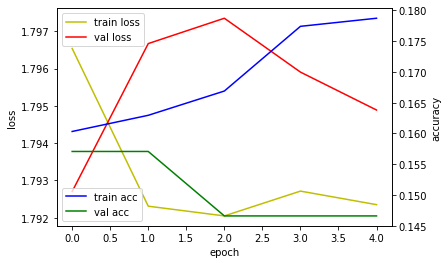

In [38]:
import matplotlib.pyplot as plt

fig, loss_ax=plt.subplots()

acc_ax=loss_ax.twinx()

loss_ax.plot(history.history['loss'],'y',label='train loss')
loss_ax.plot(history.history['val_loss'],'r',label='val loss')

acc_ax.plot(history.history['accuracy'],'b',label='train acc')
acc_ax.plot(history.history['val_accuracy'],'g',label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()